In [1]:
%%html

<h1> Bit Stuck Prevention </h1>
<p> Detect imminent Bit Stuck using exponential moving average. </p>

In [2]:
!jupyter kernelspec list

Available kernels:
  .net-csharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-csharp
  .net-fsharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-fsharp
  python3        C:\App\Dev\Anaconda3\share\jupyter\kernels\python3


BSP_Main
BSP_LoadData
BSP_ProcessData
BSP_DisplayData
Interact_Demo


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='x', options=('abc', 'xyz'), value='abc'), Output()), _dom_classes=…

BSP_Scatter_Chart_Demo


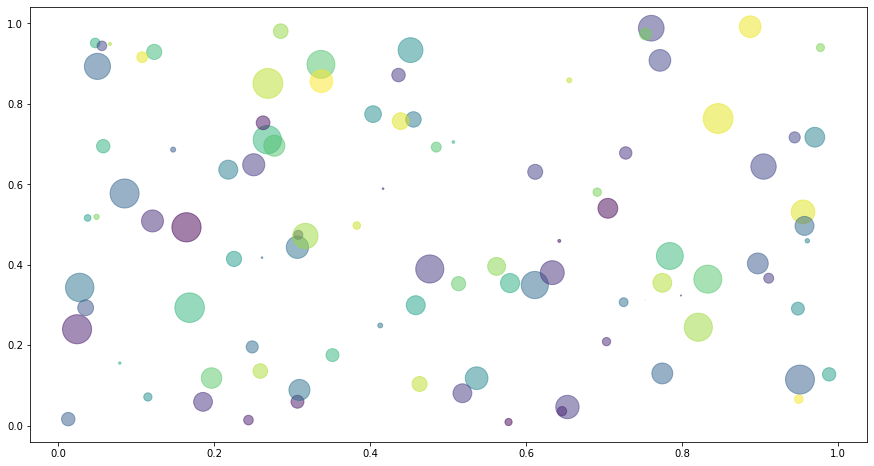

In [3]:
from bsp import *

BSP_Main()

In [4]:
from interaction import *

Interact_Demo()


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='x', options=('abc', 'xyz'), value='abc'), Output()), _dom_classes=…

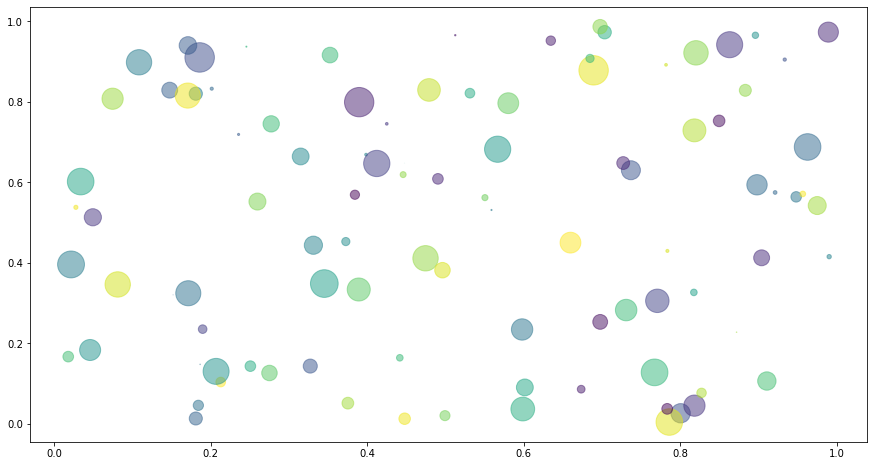

In [5]:
from charts import *

Chart_Demo()